<a href="https://colab.research.google.com/github/ChimaobiOgbonna/Chimaobi-Ogbonna-Portfolio/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 79.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=c24af99e4d388b8b1380921602bf4f9c11e7a867a11bde39dcd1c57c40b55ca6
  Stored in directory: /root/.cache/pip/wheels/94/ad/df/a2a01300cea47d5695f242f7e925a805970106fd9e4b151468
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3354 sha256=a268019d6b19b4d49862e0b911176b7bbbcaa67784b3b8146de77

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
from textblob import TextBlob
from newspaper import Article

url = 'https://punchng.com/full-speech-obi-breaks-silence-after-election-prepares-for-legal-battle/'

In [6]:
speech = Article(url) # tranform url into Article object and save as speech.

speech.download() #download the speech
speech.parse() #make it readable 
speech.nlp() # preparing the speech for natural language process

In [7]:
Peter_speech = speech.text
print(Peter_speech)

The Labour Party presidential candidate, Peter Obi, on Thursday, broke his silence on the outcome of last Saturday’s presidential election, claiming that the exercise was marred by irregularities.

The former Anambra State governor who addressed a world press conference in Abuja claimed that the process that produced Bola Tinubu of the All Progressives Congress as president-elect was “programmed for determined results”.

He, however, vowed to explore all legal options to recover his “mandate”, claiming he won the presidential poll.

Below is the full text of the address:

“Again, my dear people,

Let me correct an impression because I’m seeing some people saying in the media that I released one news or the other. I have never, directly or indirectly, spoken or released any message since after voting on the 25th. My last comment to the media was immediately after voting on the 25th, and I’ve never done so until now. So, whatever you see in the media please disregard. It’s not coming fro

In [8]:
#let us check the overall polarity and subjectivity
blob = TextBlob(Peter_speech)
print(blob.sentiment)

Sentiment(polarity=0.21812263420959074, subjectivity=0.5581547357634313)


In [9]:
#let us break the speech into sentences (and later check of polarity and subjectivity of each sentence)
Sentence_set = blob.sentences
print(Sentence_set)

[Sentence("The Labour Party presidential candidate, Peter Obi, on Thursday, broke his silence on the outcome of last Saturday’s presidential election, claiming that the exercise was marred by irregularities."), Sentence("The former Anambra State governor who addressed a world press conference in Abuja claimed that the process that produced Bola Tinubu of the All Progressives Congress as president-elect was “programmed for determined results”."), Sentence("He, however, vowed to explore all legal options to recover his “mandate”, claiming he won the presidential poll."), Sentence("Below is the full text of the address:

“Again, my dear people,

Let me correct an impression because I’m seeing some people saying in the media that I released one news or the other."), Sentence("I have never, directly or indirectly, spoken or released any message since after voting on the 25th."), Sentence("My last comment to the media was immediately after voting on the 25th, and I’ve never done so until now

In [10]:
#We are going to delete the first three sentences from the speech. These are introductory text from the news writer.
del Sentence_set[0:3]

In [11]:
#get the polartity of and subjectiveity of each sentence and append it to an empty list
Polarity = []
Subjectivity = []
My_sentence = []
for sentence in Sentence_set:
  pol = sentence.polarity
  Polarity.append(round(pol,3))
  sub = sentence.subjectivity
  Subjectivity.append(round(sub,3))
  My_sentence.append(str(sentence).strip())

In [12]:
#check the total number of sentences
print (len(Sentence_set), len(My_sentence))

49 49


In [13]:
#decide whether the polarity is positive or negative
pol_decision =[]
for num in Polarity:
  if (num <0):
    pol_decision.append('negative')
  elif (num == 0):
    pol_decision.append('neutral')
  else:
    pol_decision.append('positive')



In [14]:
#decide the extent of subjectivity
sub_decision =[]
for num in Subjectivity:
  if (num < .5):
    sub_decision.append('objective')
  elif (num > .5):
    sub_decision.append('subjective')
  else:
    pol_decision.append('neutral')

In [15]:
#organise the information in a table
import pandas as pd

df = pd.DataFrame(list(zip(My_sentence, Polarity, pol_decision, Subjectivity, sub_decision)),
               columns =['sentence', 'polarity', 'polarity_decision', 'subjectivity','subjectivity_decision'])

In [16]:
df.head(10)

,sentence,polarity,polarity_decision,subjectivity,subjectivity_decision
0,Below is the full text of the address:\n\n“Aga...,0.112,positive,0.463,objective
1,"I have never, directly or indirectly, spoken o...",-0.050,negative,0.400,objective
2,My last comment to the media was immediately a...,0.000,neutral,0.067,objective
3,"So, whatever you see in the media please disre...",0.000,neutral,0.000,objective
4,It’s not coming from me directly or indirectly.,0.100,positive,0.400,objective
5,“This is my first time of speaking to the medi...,0.250,positive,0.333,objective
6,"For me, it is a very simple thing to speak to ...",0.375,positive,0.716,subjective
7,We give thanks to God.,0.200,positive,0.200,objective
8,"“For me, the number one thing is gratitude.",0.000,neutral,0.000,objective
9,Gratitude to God Almighty that continues to pr...,0.000,neutral,0.000,objective


In [34]:
#save to csv
# saving the dataframe
df.to_csv('sentiment_analysis.csv', index=False)


In [24]:
#find the most posititve sentence
pos_df = df.sort_values(by = 'polarity', ascending = False)
pos_df.head()

,sentence,polarity,polarity_decision,subjectivity,subjectivity_decision
29,It is my belief that if you must answer “His E...,1.000,positive,1.000,subjective
23,“The good and hardworking people of Nigeria ha...,0.700,positive,0.600,subjective
47,We must build a better Nigeria where Nigerian ...,0.600,positive,0.875,subjective
34,“I assure the good people of Nigeria that we w...,0.383,positive,0.433,objective
6,"For me, it is a very simple thing to speak to ...",0.375,positive,0.716,subjective


In [23]:
#find the most objecitive sentence
sub_df = df.sort_values(by = 'subjectivity', ascending = True)
sub_df.head(20)

,sentence,polarity,polarity_decision,subjectivity,subjectivity_decision
48,“Thank you and may God Almighty continue to bl...,0.0,neutral,0.000,objective
38,I enjoin you to go out.,0.0,neutral,0.000,objective
39,Campaign.,0.0,neutral,0.000,objective
16,I know how they will be feeling now because of...,0.0,neutral,0.000,objective
32,"As you know, the destruction of a society begi...",0.0,neutral,0.000,objective
40,Come out and vote in that election.,0.0,neutral,0.000,objective
42,"Please, come out and be part of that election.",0.0,neutral,0.000,objective
43,I assure you that I will be part of it.,0.0,neutral,0.000,objective
36,"“Please, do not despair.",0.0,neutral,0.000,objective
19,“The election that we just witnessed has been ...,0.0,neutral,0.000,objective


In [25]:
df['polarity_decision'].value_counts()

positive    24
neutral     22
negative     3
Name: polarity_decision, dtype: int64

In [26]:
df['subjectivity_decision'].value_counts()

objective     33
subjective    16
Name: subjectivity_decision, dtype: int64

In [27]:
#create a dataframe of all the different types of statements
df2 = df.loc[df['polarity_decision'] == 'positive'] #statement with positive polarity
df3 = df.loc[df['subjectivity_decision']== 'objective'] # statements with objective objectivity
Pol_Sub = df.loc[(df['polarity_decision'] == 'positive') & (df['subjectivity_decision'] == 'objective')] # statements with both pos pol and obj obj

In [28]:
#save all the different statements in seperate lists
positive_sentence = []
for sen in df2['sentence']:
  positive_sentence.append(str(sen).strip())

objective_sentence = []
for sen in df3['sentence']:
  objective_sentence.append(str(sen).strip())

pos_obj_sentence =[]
for sen in Pol_Sub['sentence']:
  pos_obj_sentence.append(str(sen).strip())


In [29]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
#creating wordcloud

#importing necessary library 
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

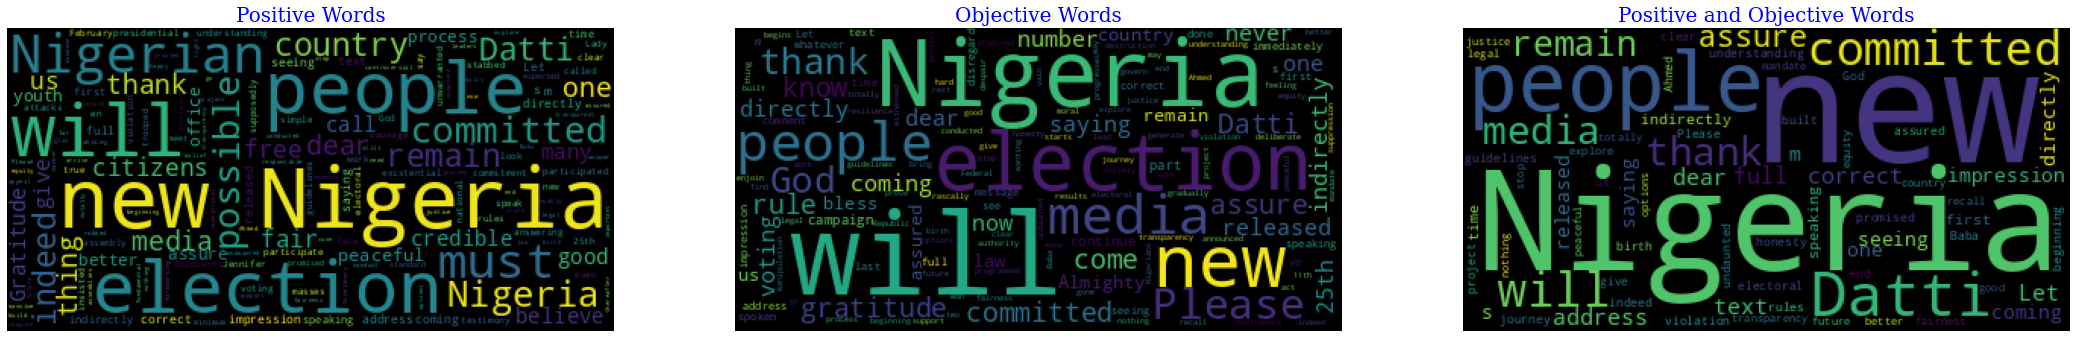

In [33]:
#combining all the sentences into one single string
cloud1 = ' '.join(positive_sentence)
cloud2 = ' '.join(objective_sentence)
cloud3 = ' '.join(pos_obj_sentence)

# making the wordcloud

plt.figure()

#postive words
plt.subplot(341)
wc1 = WordCloud(stopwords = STOPWORDS).generate(cloud1)
font1 = {'family':'serif','color':'blue','size':20}
plt.imshow(wc1)
plt.axis('off')
plt.title('Positive Words', fontdict = font1)
plt.rcParams['figure.figsize'] = [50, 50]


#objective words
plt.subplot(342)
wc2 = WordCloud(stopwords = STOPWORDS).generate(cloud2)
font1 = {'family':'serif','color':'blue','size':20}
plt.imshow(wc2)
plt.axis('off')
plt.title('Objective Words', fontdict = font1)
plt.rcParams['figure.figsize'] = [50, 50]


#Positive and Objective words
plt.subplot(343)
wc3 = WordCloud(stopwords = STOPWORDS).generate(cloud3)
font1 = {'family':'serif','color':'blue','size':20}
plt.imshow(wc3)
plt.axis('off')
plt.title('Positive and Objective Words', fontdict=font1)
plt.rcParams['figure.figsize'] = [50, 50]



plt.show()


# Interpretations

## Polarity


*   Overall, the polarity of the speech is `polarity = 0.218.`Hence, the speech is fairly positive.
*   The most postive statement in the speech was: **"It is my belief that if you must answer “His Excellency”, the process through which you arrive to office must be excellent."** It has a polarity score of 1. This statement was however, very subjective (*subjectivity* = 1).
*   There were 49 sentences analysed. For indvidual sentences, 49% were positive (polarity > 0), 45% were neutral (polarity = 0) while only 6% were negative (polarity < 0).
*   Wordcloud suggests that 10 most popular positive words include, **election, Nigeria, Nigerian, people, new, will, committed, country, Datti, possible**.
*   These popular words may be interpreted as reflecting Obi's and *Datti*'s *commitment* toward giving the *Nigerian people* a *new Nigeria* through the *election*. 

## Objectivity


*   Overall, the subjectivity of the speech is `subjectivity = 0.558.`Hence, the speech is moderately objective.
*   18 sentences where perfectly objective with a subjectivity value of 0. These statements were also neutral (*polarity* = 0)
*   There were 49 sentences analysed. For indvidual sentences, 67% were objective (subjectivity < .5), while only 33% were subjective (subjectivity > .5).
*   Wordcloud suggests that 10 most popular objective words include, **Nigeria, election, people, gratitude, new, media, God, will, thank, Datti.**
*   These popular words may be interpreted as reflecting Obi's and *Datti*'s *gratitude to God*, the *people of Nigeria* and the *media* for their support in the *election.*


## Conclusion

*   10 sentences (20.4%) were found to be both positive and objective.
*   popular words among these sentences include, **New, Nigeria, people, Datti, will, assure, thank, remain, committed.**
*   These popular words suggest that Obi's and *Datti* are *thankful* to the *people of Nigeria* and *assures the people* of their *committment* towards achieveing a *new Nigeria*.
*   In all, the speech was fairly objective and postive, and appears to offer hope and positive direction to the people of Nigeria.





